In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Data Pre-processing
### Import Time Series Data

In [2]:
ff1 = pd.read_csv('2019JanFeb/2019-01.csv')
ff2 = pd.read_csv('2019JanFeb/2019-02.csv')

In [3]:
print('There are', ff1.location.nunique(), 'retail areas in the 2019-01 footfall data.')
ff1.head()

There are 698 retail areas in the 2019-01 footfall data.


timestamp  location  device  probes_global  probes_local  \
0  2019-01-01 00:00:00         3    1032            152           127   
1  2019-01-01 00:05:00         3    1032            190           118   
2  2019-01-01 00:10:00         3    1032            160            67   
3  2019-01-01 00:15:00         3    1032            124            36   
4  2019-01-01 00:20:00         3    1032            156           119   

   macs_global  macs_local  counts_global  counts_local  adjusted_local  \
0           28          90             17             1              15   
1           25          84             16            84              10   
2           22          47              8            46               4   
3           19          29              8            29               3   
4           26          81             12            79              10   

  imputed  
0       f  
1       f  
2       f  
3       f  
4       f

In [4]:
print('There are', ff2.location.nunique(), 'retail areas in the 2019-02 footfall data.')
ff2.head()

There are 660 retail areas in the 2019-02 footfall data.


timestamp  location  device  probes_global  probes_local  \
0  2019-02-01 00:00:00         3    1032            197            69   
1  2019-02-01 00:05:00         3    1032            176            42   
2  2019-02-01 00:10:00         3    1032            119            49   
3  2019-02-01 00:15:00         3    1032            236            59   
4  2019-02-01 00:20:00         3    1032            278           139   

   macs_global  macs_local  counts_global  counts_local  adjusted_local  \
0           30          42             17             4               6   
1           22          24             13            24               4   
2           27          34             17            34               7   
3           25          44             18            43               5   
4           32          89             19            88              10   

  imputed  
0       f  
1       f  
2       f  
3       f  
4       f

The number of retail areas doesn't match.

### Merge Data

In [5]:
ff12 = ff1.append(ff2)

### Extract Features from Timestamp

In [6]:
ff12.timestamp = pd.to_datetime(ff12.timestamp, format = '%Y-%m-%d %H:%M:%S')

ff12['year'] = ff12.timestamp.dt.year
ff12['month'] = ff12.timestamp.dt.month
ff12['day'] = ff12.timestamp.dt.day
ff12['hour'] = ff12.timestamp.dt.hour
ff12['day_of_week'] = ff12.timestamp.dt.dayofweek + 1
ff12['count'] = ff12.counts_global + ff12.counts_local
ff12.head()

timestamp  location  device  probes_global  probes_local  \
0 2019-01-01 00:00:00         3    1032            152           127   
1 2019-01-01 00:05:00         3    1032            190           118   
2 2019-01-01 00:10:00         3    1032            160            67   
3 2019-01-01 00:15:00         3    1032            124            36   
4 2019-01-01 00:20:00         3    1032            156           119   

   macs_global  macs_local  counts_global  counts_local  adjusted_local  \
0           28          90             17             1              15   
1           25          84             16            84              10   
2           22          47              8            46               4   
3           19          29              8            29               3   
4           26          81             12            79              10   

  imputed  year  month  day  hour  day_of_week  count  
0       f  2019      1    1     0            2     18  
1       f  2019      1    1     0            2    100  
2       f  2019      1    1     0            2     54  
3       f  2019      1    1     0            2     37  
4       f  2019      1    1     0            2     91

# Statistical Analysis

#### _Mean FF Couts by 5 min:_

<AxesSubplot:title={'center':'Footfall Count'}, xlabel='timestamp'>

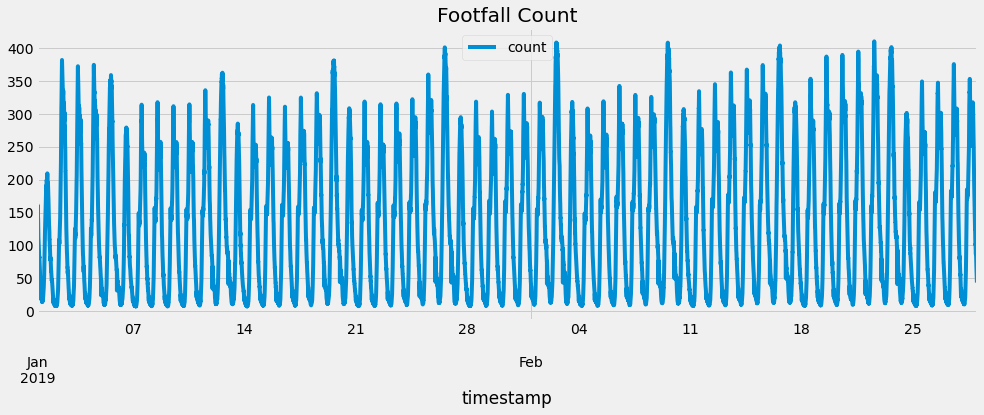

In [7]:
ff_sum = ff12.groupby('timestamp')['count'].mean().to_frame()
ff_sum.plot(figsize =(15,5), title = "Footfall Count", fontsize = 14)

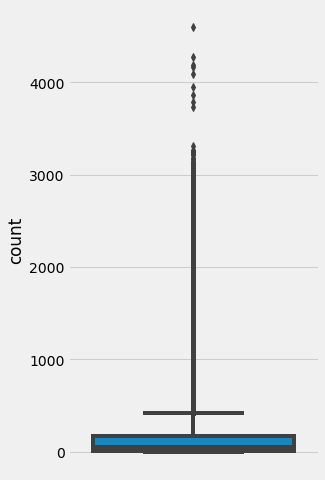

In [8]:
plt.figure(figsize=(4,8))
sns.boxplot(y = 'count', data = ff12)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.show()

- FF counts ranges really wide.

#### *Boxplot of FF CountsGroup by Day of Week:*

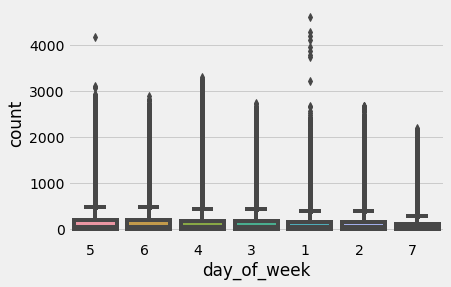

In [9]:
plt.figure(figsize=(6,4))
sort_count = ff12.groupby('day_of_week')['count']\
                    .median()\
                    .sort_values(ascending = False)\
                    .index
sns.boxplot(y = 'count', x = 'day_of_week', data = ff12, order = sort_count)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.show()

- Friday enjoys the highest median FF counts, followed by Saturday. And Sunday has the lowest median FF counts.

#### *Boxplot of FF Counts Group by Hour:*

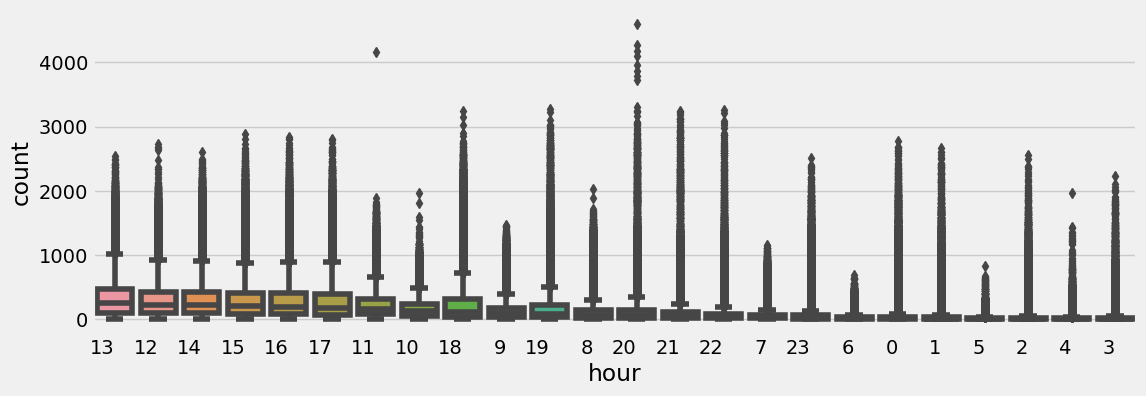

In [91]:
plt.figure(figsize=(12,4))
sort_count = ff12.groupby('hour')['count']\
                    .median()\
                    .sort_values(ascending = False)\
                    .index
sns.boxplot(y = 'count', x = 'hour', data = ff12, order = sort_count)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.show()

### Distribution

In [10]:
import seaborn as sns
import os
import statistics

#### *Mean FF Counts per 5 min:*

Text(0.5, 0, 'Footfall Counts Distribution')

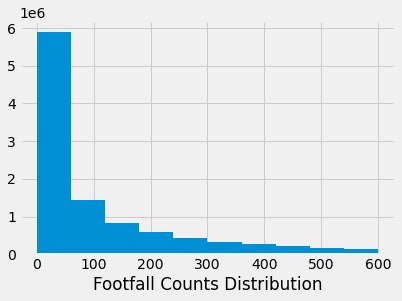

In [11]:
ff12.loc[ff12['count'] <= 600]['count'].hist()
plt.xlabel('Footfall Counts Distribution')

Text(0.5, 0, 'Footfall Counts')

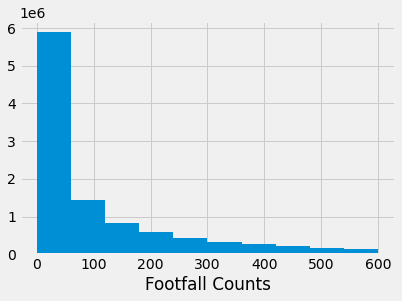

In [12]:
ff12_0 = ff12.loc[ff12['count'] <= 600]
ff12_0['count'].hist()
plt.xlabel('Footfall Counts')

In [13]:
ff12_0['count'].plot(kind = 'kde')
plt.xlim(xmin = 0)

In [14]:
#plt.xlim(xmin = 0)
#ff12.loc[ff12['count'] <= 600]['count'].plot(kind = 'kde')

- The mean FF counts distribution satisfies the power law distribution.

In [15]:
#Hourly
hourly = ff_sum.resample('H').mean()

#Daily
daily = ff_sum.resample('D').mean()

#Weekly
weekly = ff_sum.resample('W').mean()

#Monthly
monthly = ff_sum.resample('M').mean()

#### *Hourly Mean:*

Text(0.5, 0, 'Footfall Counts by Hourly Mean')

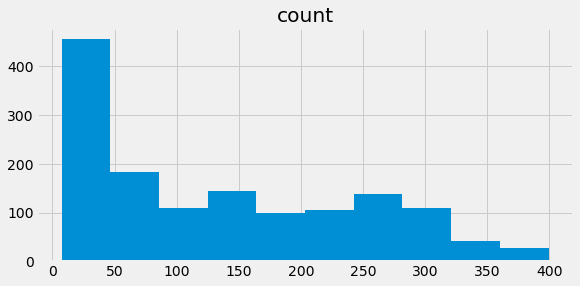

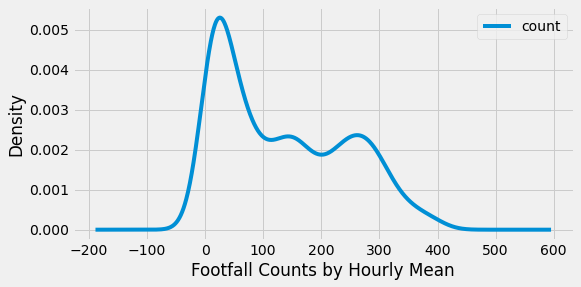

In [16]:
hourly.hist(figsize = (8.55,4))
hourly.plot(figsize = (8,4), kind='kde')
plt.xlabel('Footfall Counts by Hourly Mean')

- The hourly mean FF counts distribution does not perfectly satisfy the power law distribution but close.

#### *Daily Mean:*

Text(0.5, 0, 'Footfall Counts Distribution by Daily Mean')

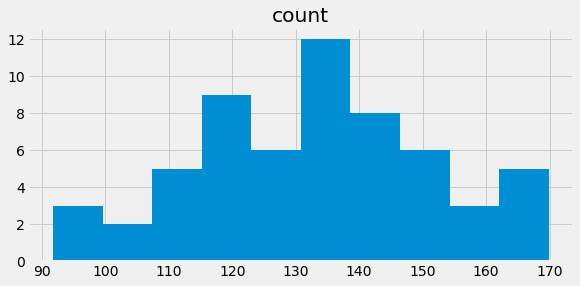

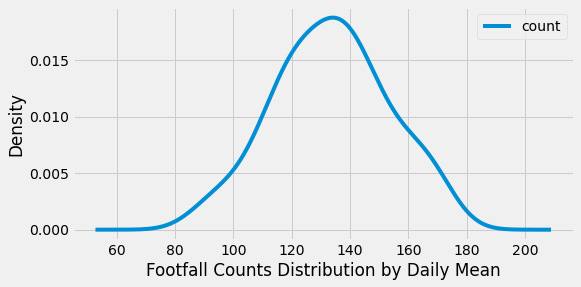

In [17]:
daily.hist(figsize = (8.7,4))
daily.plot(figsize = (8,4), kind='kde')
plt.xlabel('Footfall Counts Distribution by Daily Mean')

- The daily mean FF counts distribution satisfies Gaussian (normal distribution).

### Category

#### _Mean FF Couts by Year:_

<AxesSubplot:xlabel='year'>

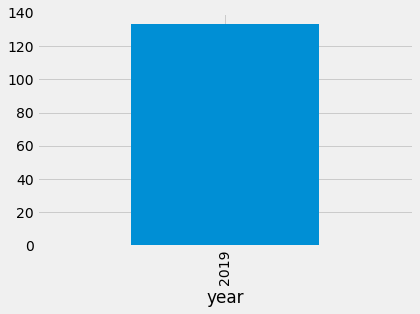

In [18]:
ff12.groupby('year')['count'].mean().plot.bar()

#### _Mean FF Couts by Month:_

<AxesSubplot:xlabel='month'>

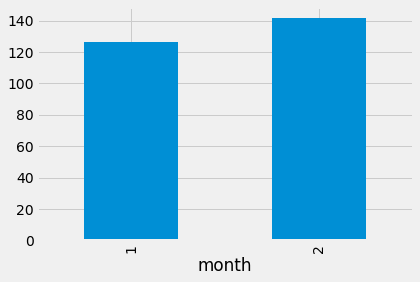

In [19]:
ff12.groupby('month')['count'].mean().plot.bar()

#### _Mean FF Couts by Year-Month:_

<AxesSubplot:title={'center':'Footfall Count(Monthwise)'}, xlabel='year,month'>

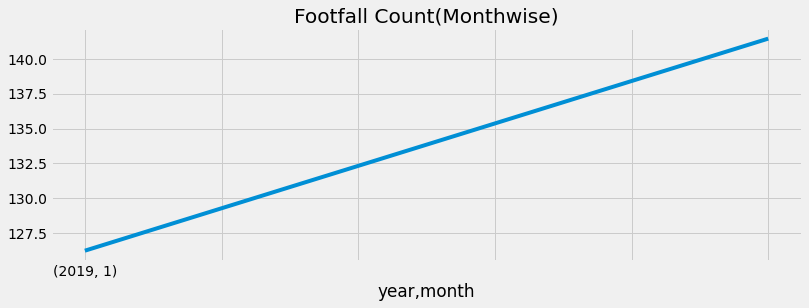

In [20]:
temp = ff12.groupby(['year', 'month'])['count'].mean()
temp.plot(figsize =(12,4), title = "Footfall Count(Monthwise)", fontsize = 14)

#### _Mean FF Couts by Day of Month:_

<AxesSubplot:xlabel='day'>

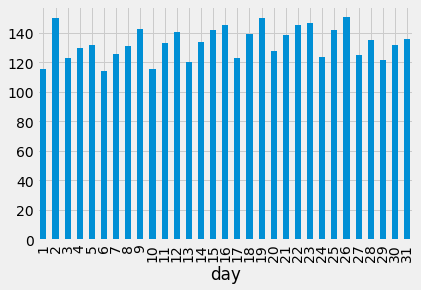

In [21]:
ff12.groupby('day') ['count'].mean().plot.bar()

#### _Mean FF Couts by Day of Week:_

<AxesSubplot:xlabel='day_of_week'>

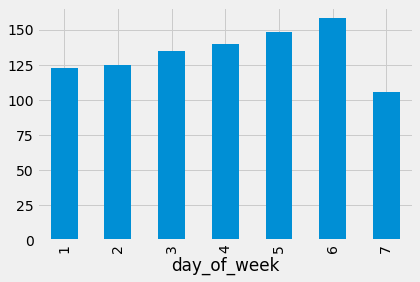

In [22]:
ff12.groupby('day_of_week')['count'].mean().plot.bar()

#### _Mean FF Couts by Hour:_

<AxesSubplot:xlabel='hour'>

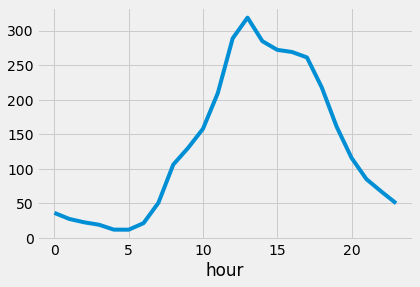

In [23]:
ff12.groupby('hour')['count'].mean().plot.line()

### Exploring Seasonality/ Trend:

<AxesSubplot:title={'center':'Monthly'}, xlabel='timestamp'>

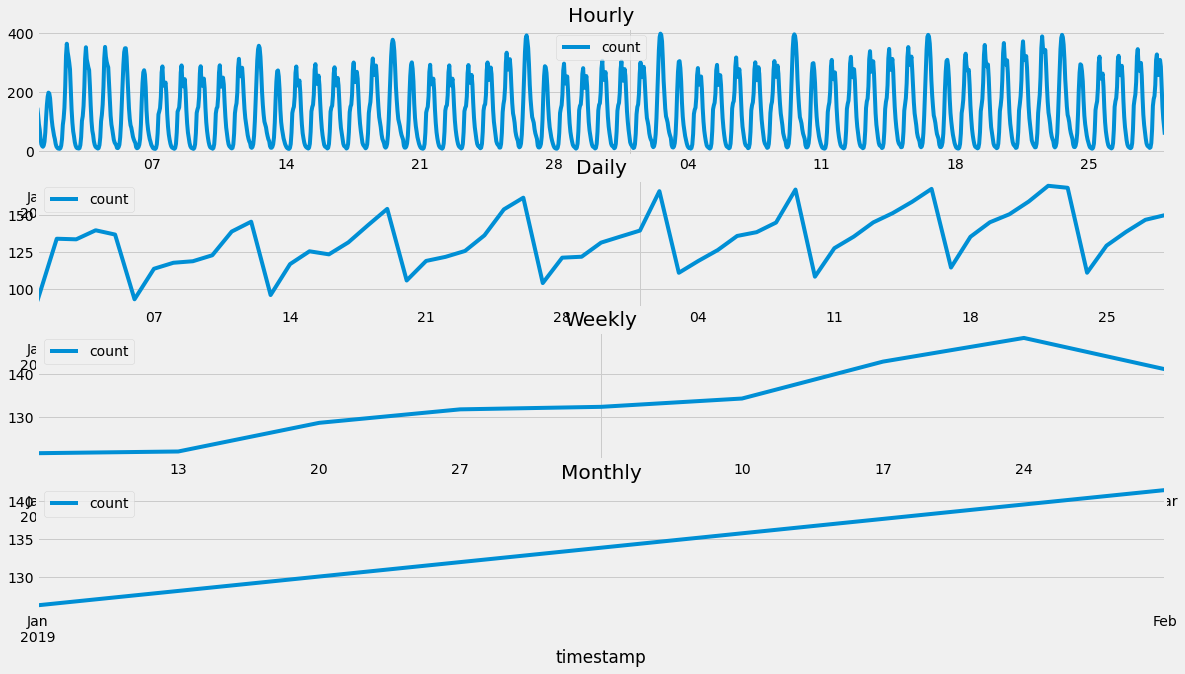

In [24]:
fig,axs = plt.subplots(4,1)

hourly.plot(figsize = (18,10), title = "Hourly", fontsize = 14, ax = axs[0])
daily.plot(figsize = (18,10), title = "Daily", fontsize = 14, ax = axs[1])
weekly.plot(figsize = (18,10), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.plot(figsize = (18,10), title = "Monthly", fontsize = 14, ax = axs[3])

# Time Series Forecasting
## Choose a Typical Case -- Location 3:

In [25]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import TimeSeriesSplit

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
loc3 = ff12.loc[ff12.location <= 3][['timestamp','count','year','month','day','hour','day_of_week']]
loc3.index = loc3.timestamp
loc3.head()

timestamp  count  year  month  day  hour  \
timestamp                                                                
2019-01-01 00:00:00 2019-01-01 00:00:00     18  2019      1    1     0   
2019-01-01 00:05:00 2019-01-01 00:05:00    100  2019      1    1     0   
2019-01-01 00:10:00 2019-01-01 00:10:00     54  2019      1    1     0   
2019-01-01 00:15:00 2019-01-01 00:15:00     37  2019      1    1     0   
2019-01-01 00:20:00 2019-01-01 00:20:00     91  2019      1    1     0   

                     day_of_week  
timestamp                         
2019-01-01 00:00:00            2  
2019-01-01 00:05:00            2  
2019-01-01 00:10:00            2  
2019-01-01 00:15:00            2  
2019-01-01 00:20:00            2

Text(0, 0.5, 'Count')

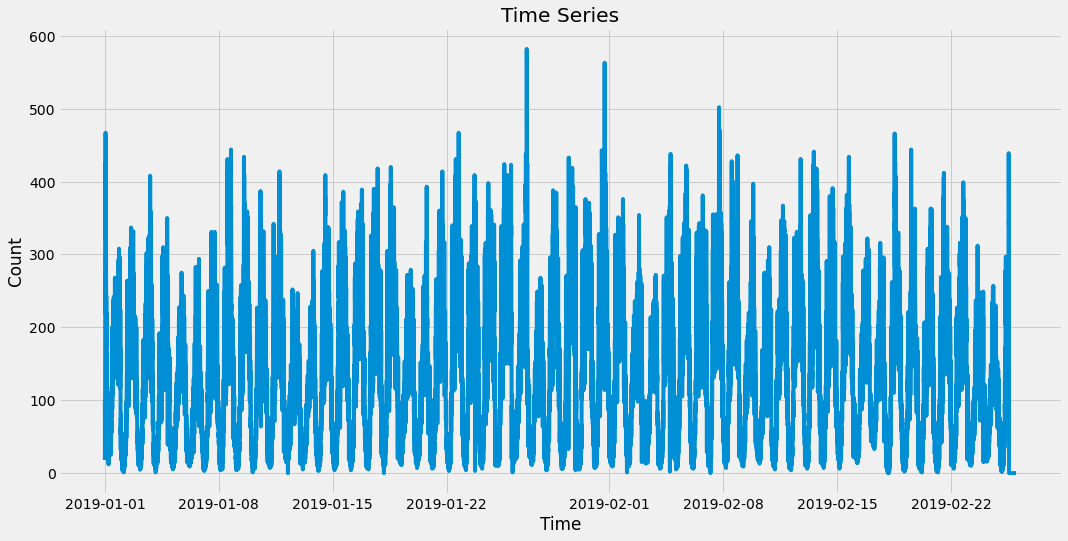

In [27]:
loc3_plot = loc3['count']
plt.figure(figsize = (16,8))
plt.plot(loc3_plot)
plt.title("Time Series")
plt.xlabel("Time")
plt.ylabel("Count")

### Check Stationarity

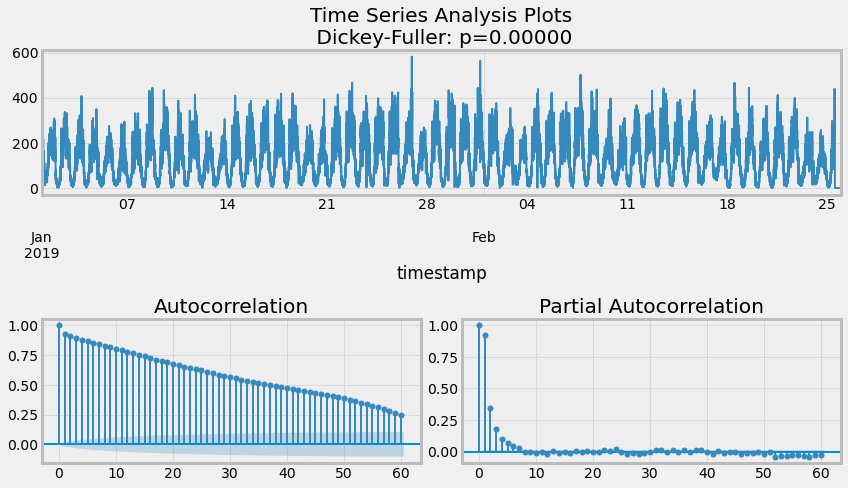

In [28]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(loc3_plot, lags=60)

- Our initial series are **stationary**, Dickey-Fuller test rejected null hypothesis that a unit root is present. It can be seen on the plot itself — we don’t have a visible trend, so mean is constant, variance is pretty much stable throughout the series. The only thing left is seasonality.

### Divide Data into Training and Validation

In [29]:
train = loc3.loc[(loc3.timestamp >= '2019-01-01 00:00:00') & (loc3.timestamp <= '2019-02-17 23:55:00')]
valid = loc3.loc[(loc3.timestamp >= '2019-02-18 00:00:00') & (loc3.timestamp <= '2019-02-24 23:55:00')]

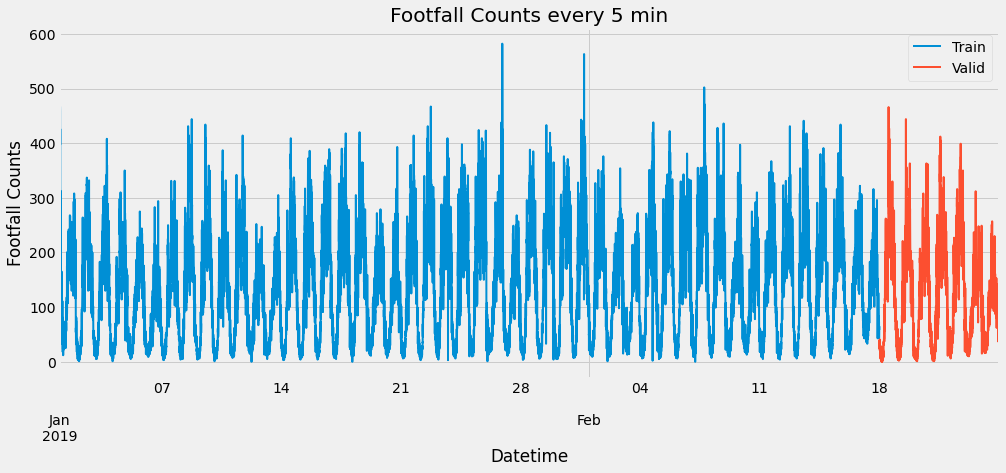

In [30]:
train['count'].plot(figsize = (15,6), title = 'Footfall Counts every 5 min', fontsize = 14, label = 'Train', linewidth = 2)
valid['count'].plot(figsize = (15,6), title = 'Footfall Counts every 5 min', fontsize =14, label = 'Valid', linewidth = 2)
plt.xlabel('Datetime')
plt.ylabel('Footfall Counts')
plt.legend(loc = 'best')

## Time Series Decomposition

Usually, time series can be decomposit as: 
**yt = St + Tt + Rt**, where **yt** is the data,**St** is the seasonal component, **Tt** is the trend-cycle component (not to be considered in our case), and **Rt** is the remainder component, all at period **t**. <br><br>
However, the footfall data shows a complex seasonality that may include **seasonal** (assume), **weekly**, and **daily** cycles. According to the pre-analysis of Karlo et al., the footfall patterns exhibits different dynamic characteristics on different days of the week, namely **Monday to Thursday**, **Friday**, **Saturday**, and **Sunday** four clusters.<br><br>

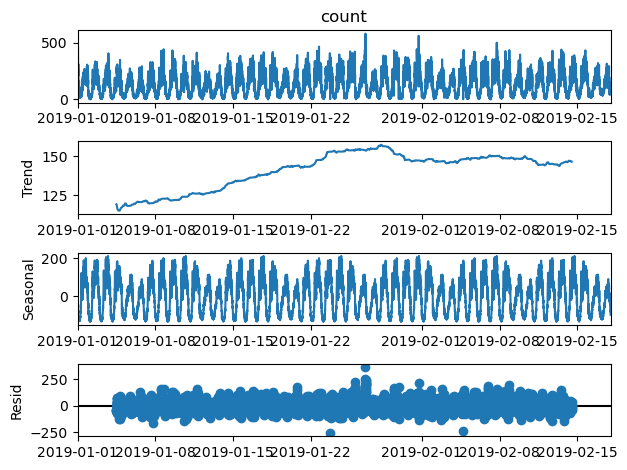

In [33]:
plt.style.use('default')
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train['count'], period = 2016).plot()
result = sm.tsa.stattools.adfuller(train['count'])
plt.show()

### 1. Naive Approach

The value of Naive forecast is simply equal to the last observation.<br>
Below is a seasonal (daily) naive forecast:

Text(0.5, 1.0, 'Naive Forecast')

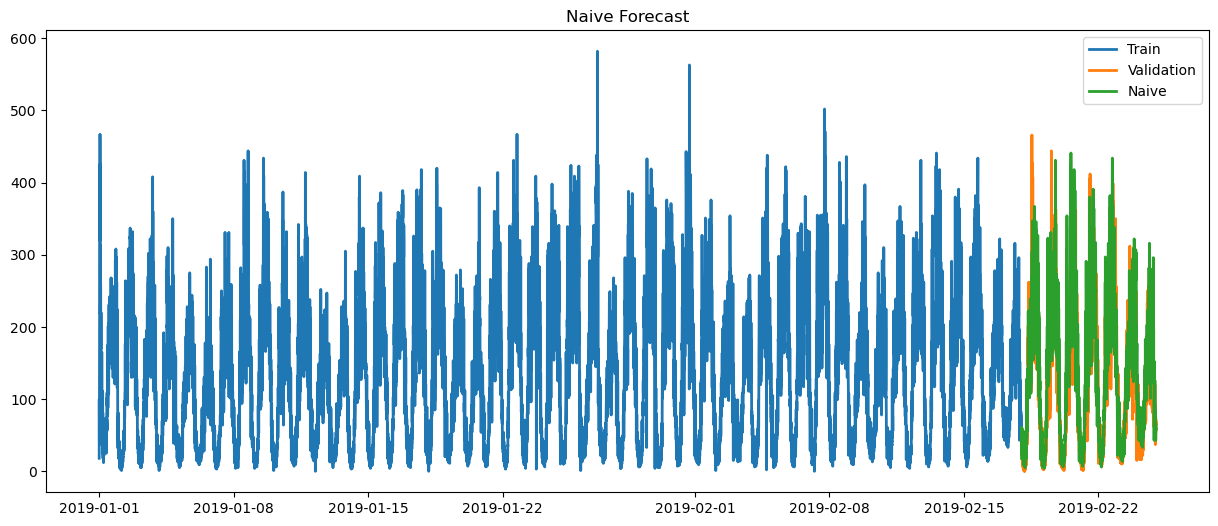

In [34]:
dd = np.asarray(train['count'])
y_hat = valid.copy()
y_hat['naive']= dd[len(dd)- 1]
for i in range(len(valid)): 
    y_hat['naive'][i]= dd[len(dd) - len(valid) + i]
    
plt.figure(figsize = (15,6))
plt.plot(train.index, train['count'], label = 'Train', linewidth = 2)
plt.plot(valid.index, valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive', linewidth = 2)
plt.legend(loc = 'best')
plt.title('Naive Forecast')

#### ***Calculate RMSE for Naive Approach:***

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid['count'], y_hat.naive))
rmse

55.13260529547526

### 2. Average Approach

#### Forecast1: Not Consider Seasonality (Daliy Fluctuations)

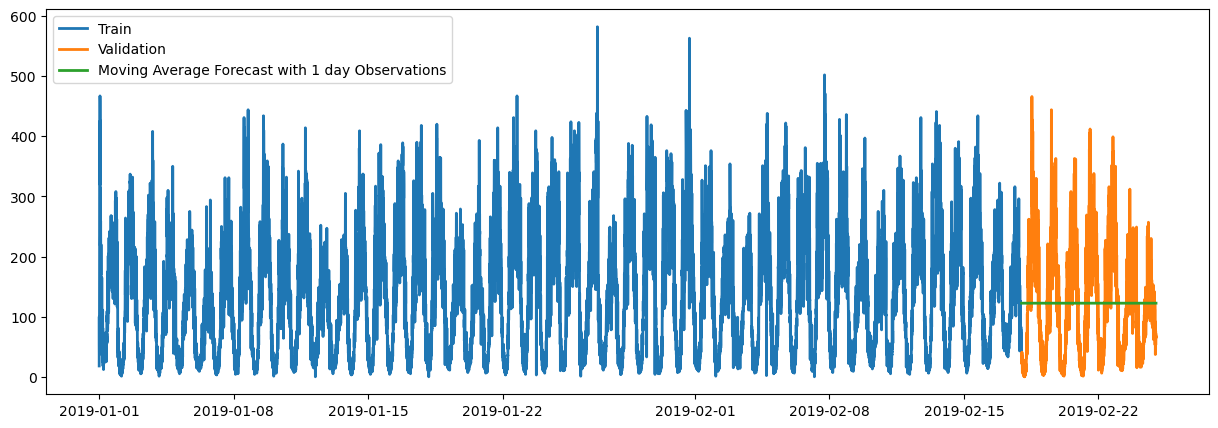

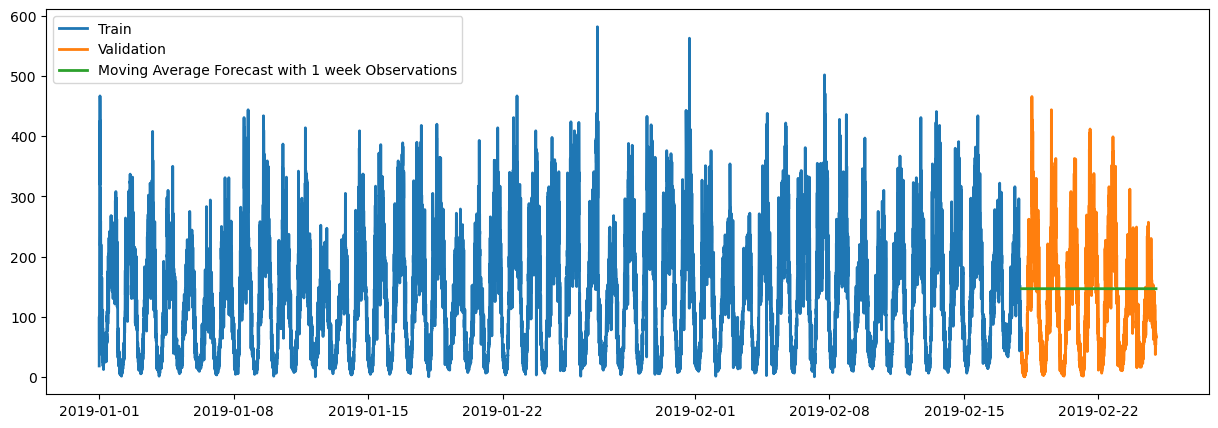

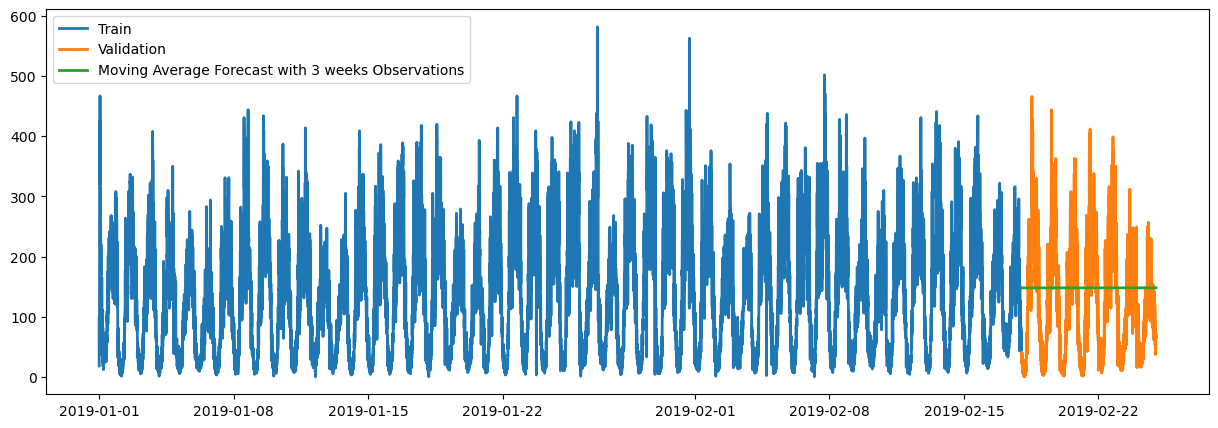

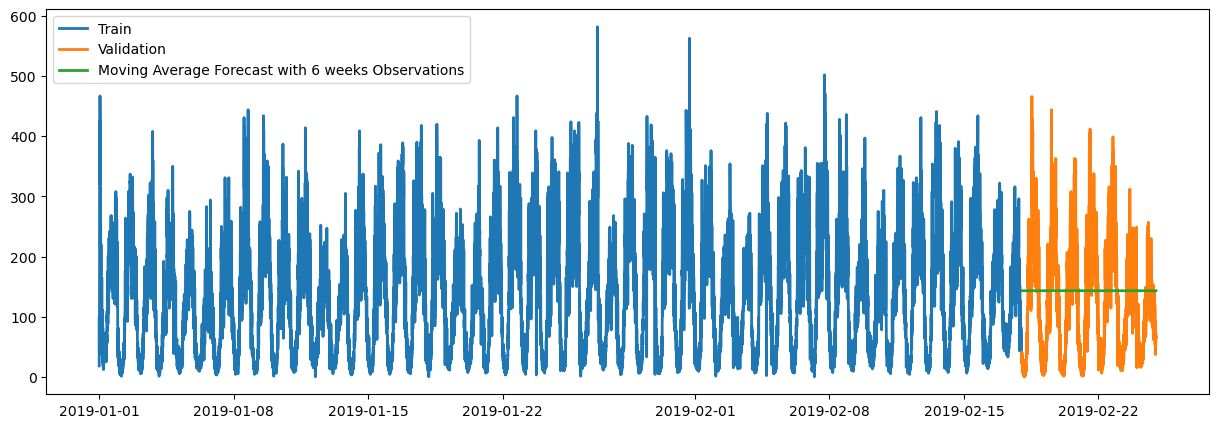

In [36]:
# 1*12*24
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast1'] = train['count'].rolling(288).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['moving_average_forecast1'], label = 'Moving Average Forecast with 1 day Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

#7*12*24
y_hat_avg['moving_average_forecast2'] = train['count'].rolling(2016).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['moving_average_forecast2'],label = 'Moving Average Forecast with 1 week Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

#3*7*12*24
y_hat_avg['moving_average_forecast3']= train['count'].rolling(6048).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['moving_average_forecast3'], label = "Moving Average Forecast with 3 weeks Observations", linewidth = 2)
plt.legend(loc = 'best')
plt.show()

#6*7*12*24
y_hat_avg['moving_average_forecast4']= train['count'].rolling(12096).mean().iloc[-1]

plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['moving_average_forecast4'], label = "Moving Average Forecast with 6 weeks Observations", linewidth = 2)
plt.legend(loc = 'best')
plt.show()

#### ***Calculate RMSE:***

In [37]:
rmse1 = sqrt(mean_squared_error(valid['count'], y_hat_avg['moving_average_forecast1']))
print('RMSE for moving average forecast with 1 day Observations is ', rmse1)

rmse2 = sqrt(mean_squared_error(valid['count'], y_hat_avg['moving_average_forecast2']))
print('RMSE for moving average forecast with 1 week Observations is ', rmse2)

rmse3 = sqrt(mean_squared_error(valid['count'], y_hat_avg['moving_average_forecast3']))
print('RMSE for moving average forecast with 3 weeks Observations is ', rmse3)

rmse4 = sqrt(mean_squared_error(valid['count'], y_hat_avg['moving_average_forecast4']))
print('RMSE for moving average forecast with 6 weeks Observations is ', rmse4)

RMSE for moving average forecast with 1 day Observations is  93.02872462483872
RMSE for moving average forecast with 1 week Observations is  94.25434159793798
RMSE for moving average forecast with 3 weeks Observations is  94.52319429959427
RMSE for moving average forecast with 6 weeks Observations is  93.71138082970609


#### Forecast2: Consider Seasonality (Daily Fluctuations)

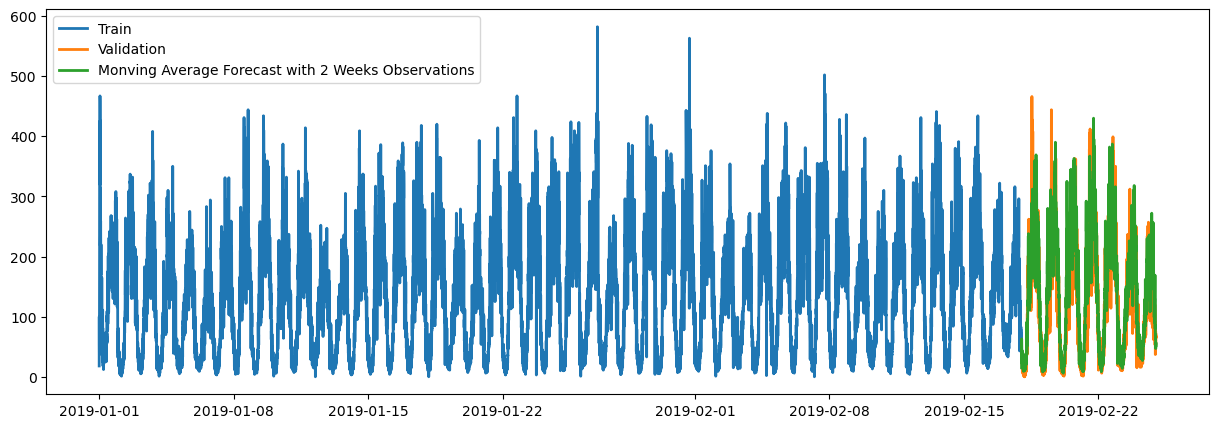

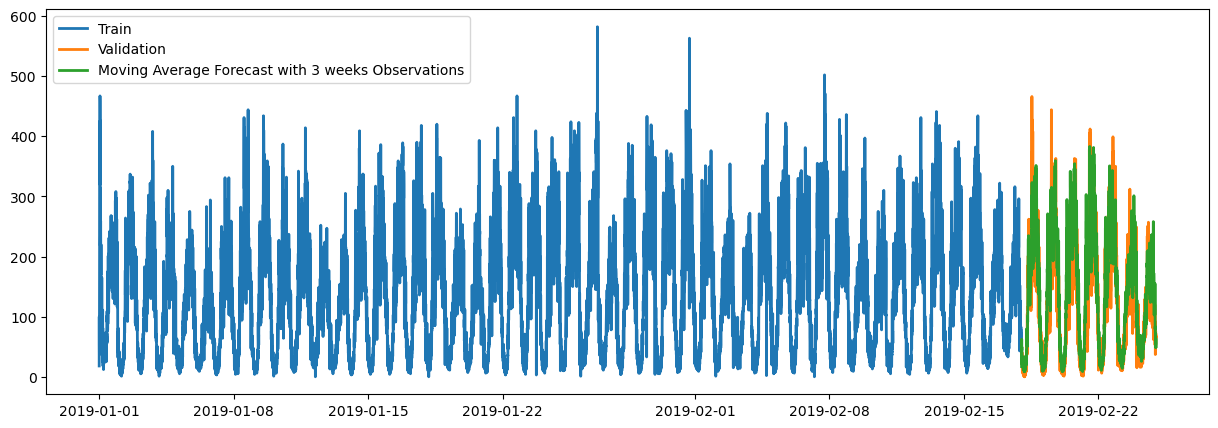

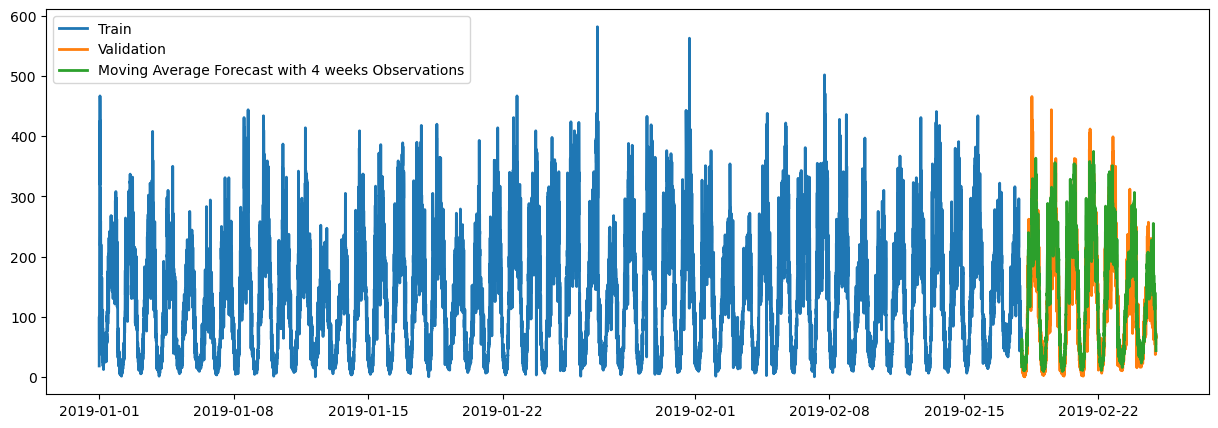

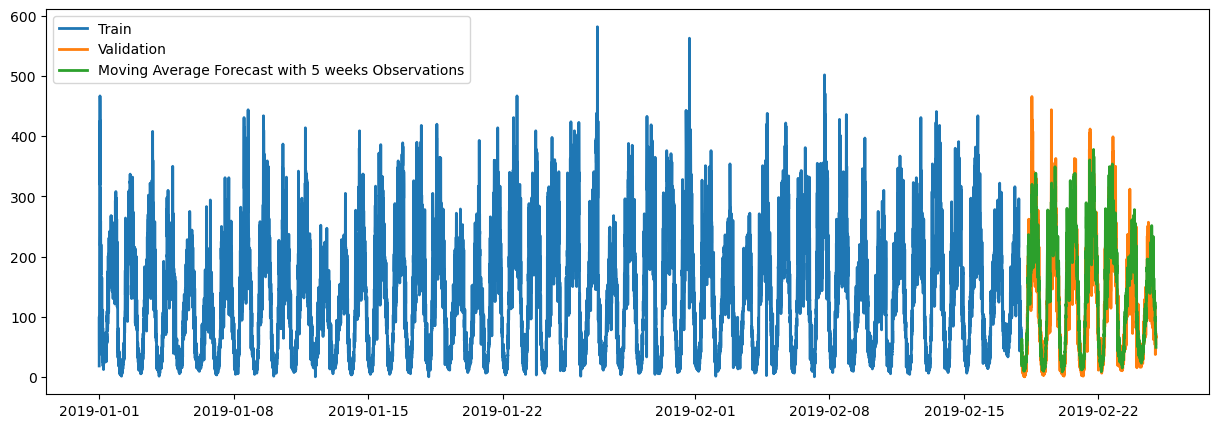

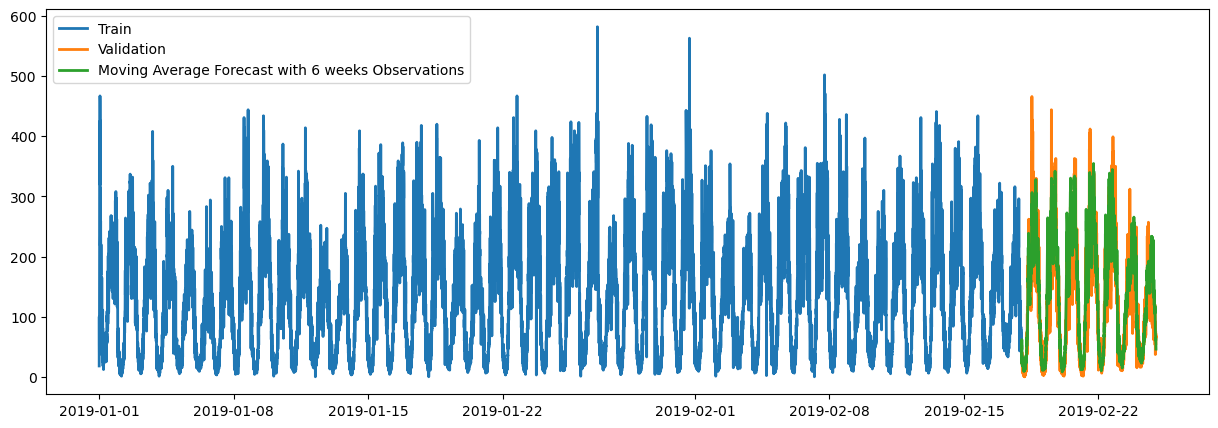

In [38]:
# Moving Average Forecast with 2 weeks Observations
y_hat_avg['average_seasonal_forecast1'] = 1
for i in range(len(valid)):
    y_hat_avg['average_seasonal_forecast1'][i] = (train['count'][len(train) - len(valid) + i] 
                                        + train['count'][len(train) - 2 * len(valid) + i]) / 2

plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['average_seasonal_forecast1'], label = 'Monving Average Forecast with 2 Weeks Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

# Moving Average Forecast with 3 weeks Observations
y_hat_avg['average_seasonal_forecast2'] = train['count'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_seasonal_forecast2'][i] = (train['count'][len(train) - len(valid) + i] 
                                        + train['count'][len(train) - 2 * len(valid) + i]
                                        + train['count'][len(train) - 3 * len(valid) + i]) / 3
plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['average_seasonal_forecast2'], label = 'Moving Average Forecast with 3 weeks Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

# Moving Average Forecast with 4 weeks Observations
y_hat_avg['average_seasonal_forecast3'] = train['count'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_seasonal_forecast3'][i] = (train['count'][len(train) - len(valid) + i] 
                                        + train['count'][len(train) - 2 * len(valid) + i]
                                        + train['count'][len(train) - 3 * len(valid) + i]
                                        + train['count'][len(train) - 4 * len(valid) + i]) / 4
plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['average_seasonal_forecast3'], label = 'Moving Average Forecast with 4 weeks Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

# Moving Average Forecast with 5 weeks Observations
y_hat_avg['average_seasonal_forecast4'] = train['count'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_seasonal_forecast4'][i] = (train['count'][len(train) - len(valid) + i] 
                                        + train['count'][len(train) - 2 * len(valid) + i]
                                        + train['count'][len(train) - 3 * len(valid) + i]
                                        + train['count'][len(train) - 4 * len(valid) + i]
                                        + train['count'][len(train) - 5 * len(valid) + i]) / 5
plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['average_seasonal_forecast4'], label = 'Moving Average Forecast with 5 weeks Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

# Moving Average Forecast with 6 weeks Observations
y_hat_avg['average_seasonal_forecast5'] = train['count'].rolling(10).mean().iloc[-1]
for i in range(len(valid)):
    y_hat_avg['average_seasonal_forecast5'][i] = (train['count'][len(train) - len(valid) + i] 
                                        + train['count'][len(train) - 2 * len(valid) + i]
                                        + train['count'][len(train) - 3 * len(valid) + i]
                                        + train['count'][len(train) - 4 * len(valid) + i]
                                        + train['count'][len(train) - 5 * len(valid) + i]
                                        + train['count'][len(train) - 6 * len(valid) + i]) / 6
plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat_avg['average_seasonal_forecast5'], label = 'Moving Average Forecast with 6 weeks Observations', linewidth = 2)
plt.legend(loc = 'best')
plt.show()

#### ***Calculate RMSE:***

In [39]:
rmse1 = sqrt(mean_squared_error(valid['count'], y_hat_avg['average_seasonal_forecast1']))
print('RMSE for moving average forecast with 2 weeks observations is ', rmse1)

rmse2 = sqrt(mean_squared_error(valid['count'], y_hat_avg['average_seasonal_forecast2']))
print('RMSE for moving average forecast with 3 weeks observations is ', rmse2)

rmse3 = sqrt(mean_squared_error(valid['count'], y_hat_avg['average_seasonal_forecast3']))
print('RMSE for moving average forecast with 4 weeks observations is ', rmse3)

rmse4 = sqrt(mean_squared_error(valid['count'], y_hat_avg['average_seasonal_forecast4']))
print('RMSE for moving average forecast with 5 weeks observations is ', rmse4)

rmse5 = sqrt(mean_squared_error(valid['count'], y_hat_avg['average_seasonal_forecast5']))
print('RMSE for moving average forecast with 6 weeks observations is ', rmse5)

RMSE for moving average forecast with 2 weeks observations is  50.02364520269469
RMSE for moving average forecast with 3 weeks observations is  46.89707681180207
RMSE for moving average forecast with 4 weeks observations is  46.023431869016285
RMSE for moving average forecast with 5 weeks observations is  43.38588457273553
RMSE for moving average forecast with 6 weeks observations is  41.147482972088


### 3. Exponential Smoothing

#### Forecast1: Simple Exponential Smoothing - Not Consider Seasonality

RMSE for simple exponential forecast is  116.93867724161612


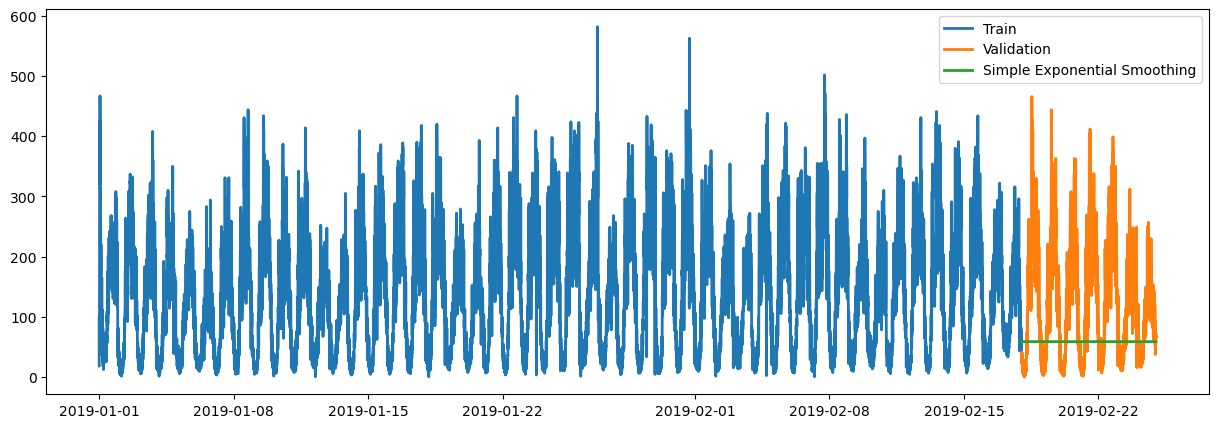

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['count'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing', linewidth = 2)
plt.legend(loc = 'best')

rmse = sqrt(mean_squared_error(valid['count'], y_hat['SES']))
print('RMSE for simple exponential forecast is ', rmse)

#### Forecast2: Holt-Winters’ Seasonal Method

RMSE for Holt Winters seasonal forecast is  87.88316935381376


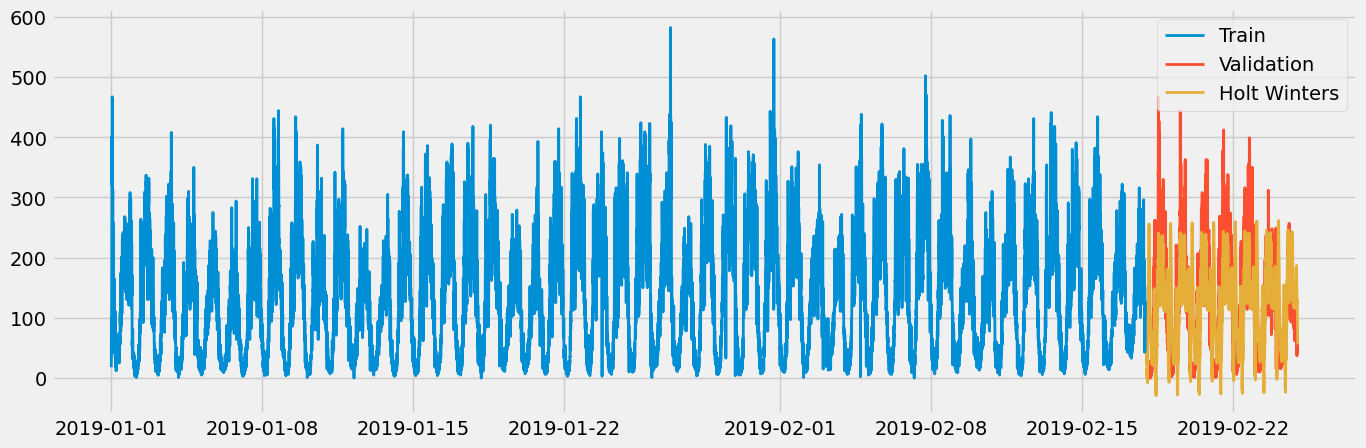

In [93]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['count']), seasonal_periods = 288, trend = 'add', seasonal= 'add').fit()
y_hat['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (15,5))
plt.plot(train['count'], label = 'Train', linewidth = 2)
plt.plot(valid['count'], label = 'Validation', linewidth = 2)
plt.plot(y_hat.Holt_Winter, label = 'Holt Winters', linewidth = 2)
plt.legend(loc = 'best')

rmse = sqrt(mean_squared_error(valid['count'], y_hat['Holt_Winter']))
print('RMSE for Holt Winters seasonal forecast is ', rmse)

### 4. ARIMA Model

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window = 2016).mean()
    rolstd = pd.Series(timeseries).rolling(window = 2016).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

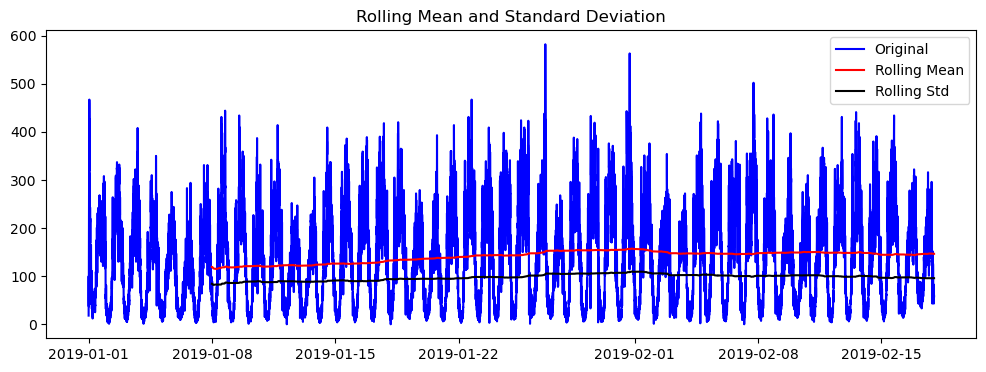

Results of Dickey Fuller test: 
Test Statistics               -1.032473e+01
p-value                        2.946119e-18
# Lag Used                     1.100000e+01
Number of Observations Used    1.381200e+04
Critical Value (1%)           -3.430824e+00
Critical Value (5%)           -2.861749e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [43]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12,4)
test_stationary(train['count'])

Actually it's hard to tell the trend from the rolling mean and rolling std using the current data (only contains two months). However, the trend may actual exist due to seasonal factors.<br>
Anyway, it's not taken into consideration right now.

#### ***Decompose***

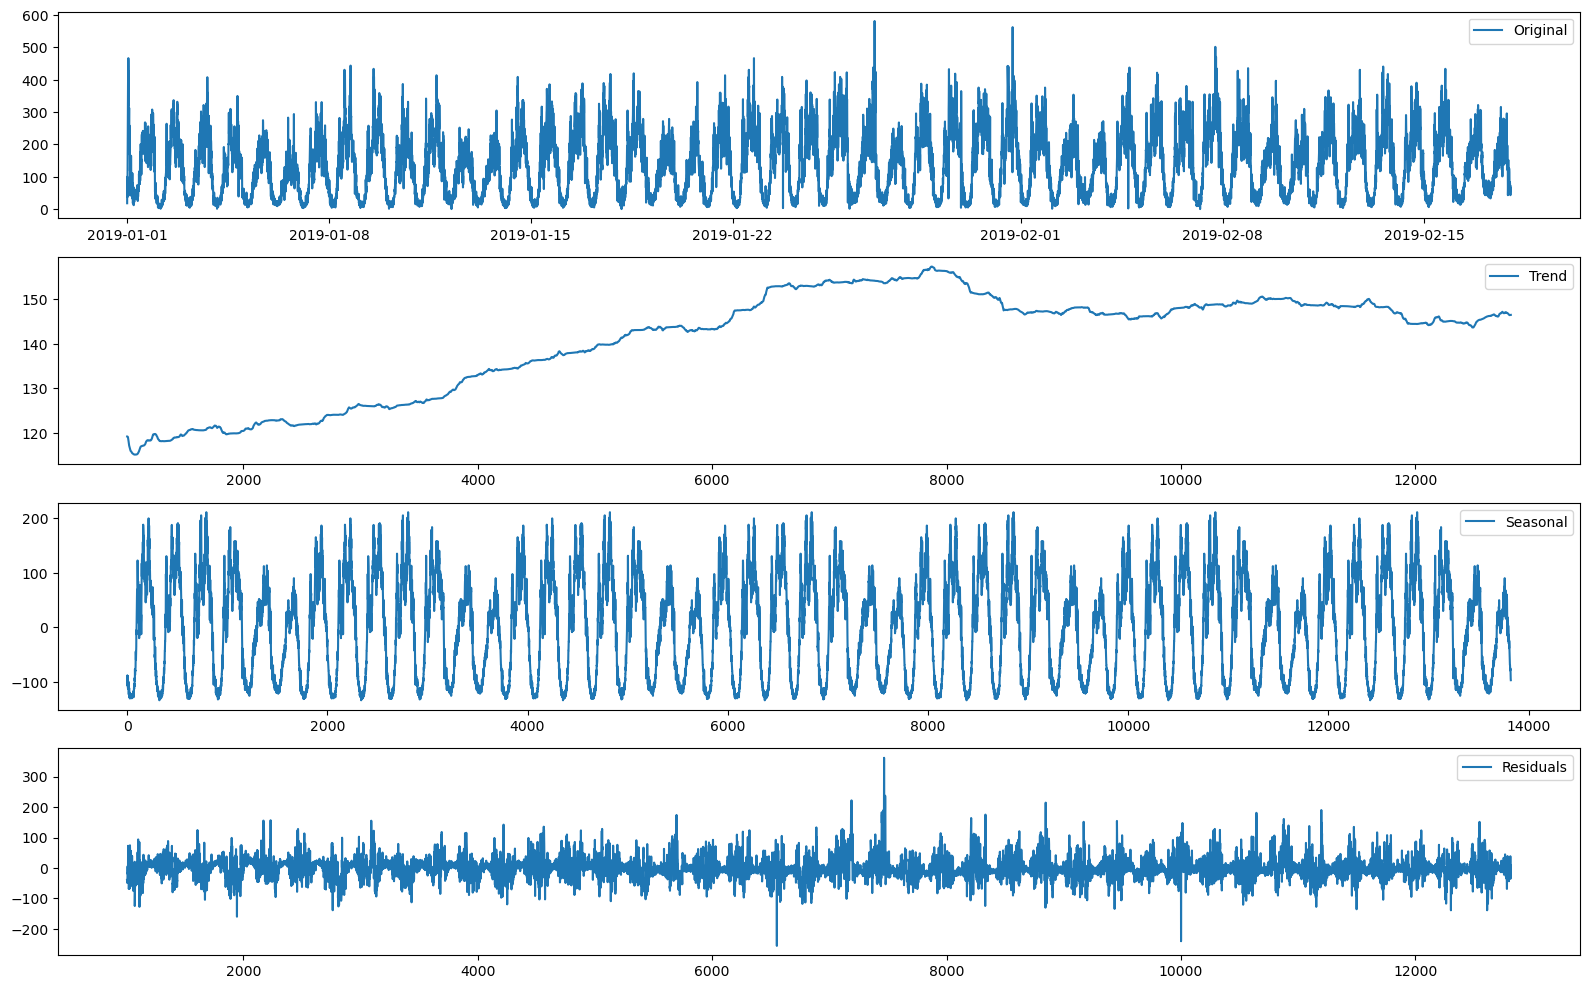

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(train)['count'].values, freq = 2016) # 1 week
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train['count'], label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

#### ***Stationarity of residuals:***

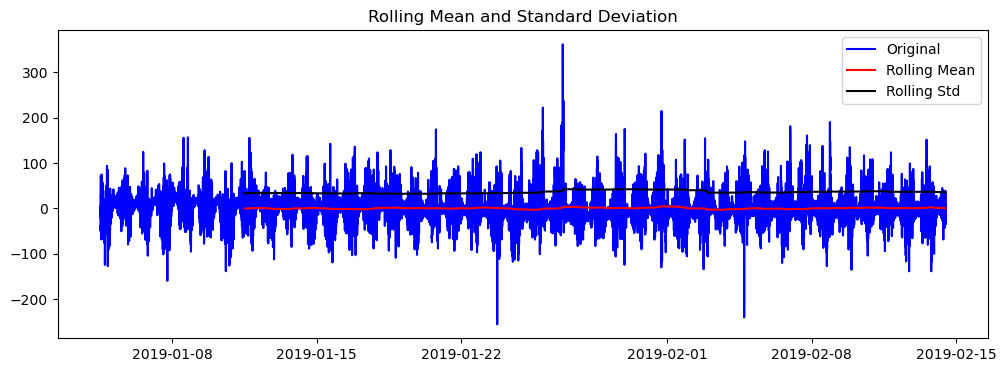

Results of Dickey Fuller test: 
Test Statistics                  -19.045874
p-value                            0.000000
# Lag Used                        15.000000
Number of Observations Used    11792.000000
Critical Value (1%)               -3.430905
Critical Value (5%)               -2.861785
Critical Value (10%)              -2.566900
dtype: float64


In [45]:
plt.figure(figsize = (12,4))
train_decompose = pd.DataFrame(residual)
train_decompose['date'] = train.index
train_decompose.set_index('date', inplace = True)
train_decompose.dropna(inplace = True)
test_stationary(train_decompose[0])

#### ***Differncing Analyzing:***

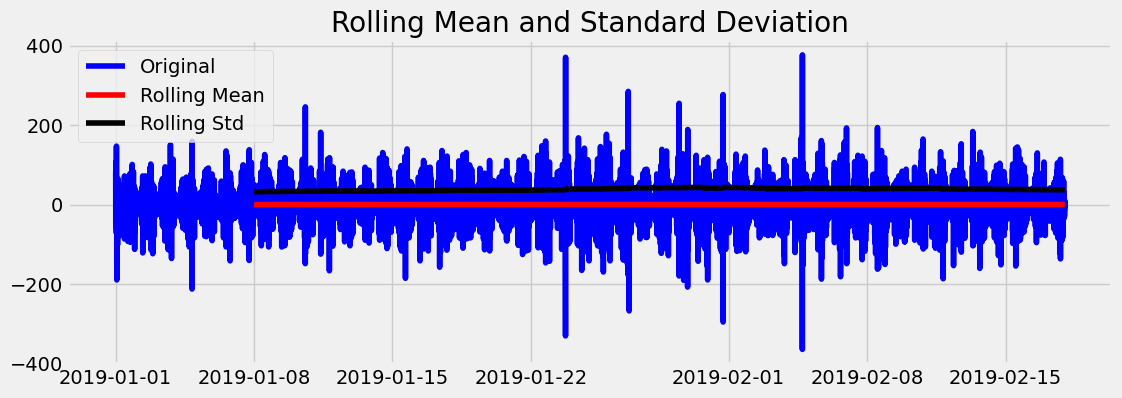

Results of Dickey Fuller test: 
Test Statistics                  -62.296508
p-value                            0.000000
# Lag Used                         5.000000
Number of Observations Used    13817.000000
Critical Value (1%)               -3.430823
Critical Value (5%)               -2.861749
Critical Value (10%)              -2.566881
dtype: float64


In [81]:
train_diff = train['count'] - train['count'].shift(1)
rcParams['figure.figsize'] = (12,4)
test_stationary(train_diff.dropna())

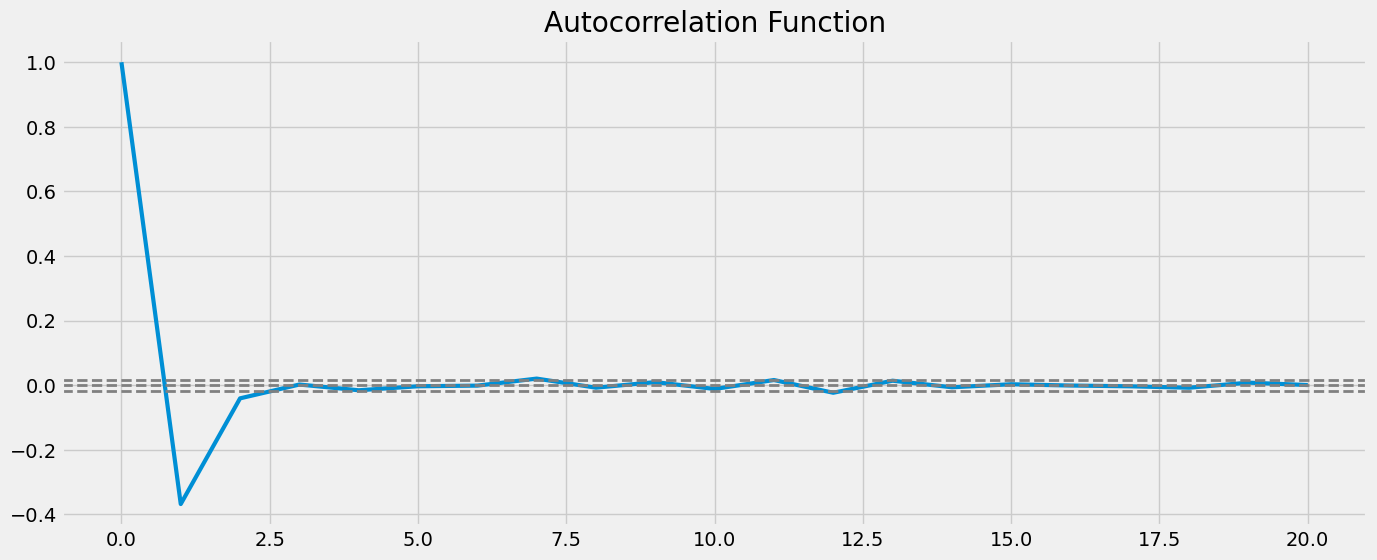

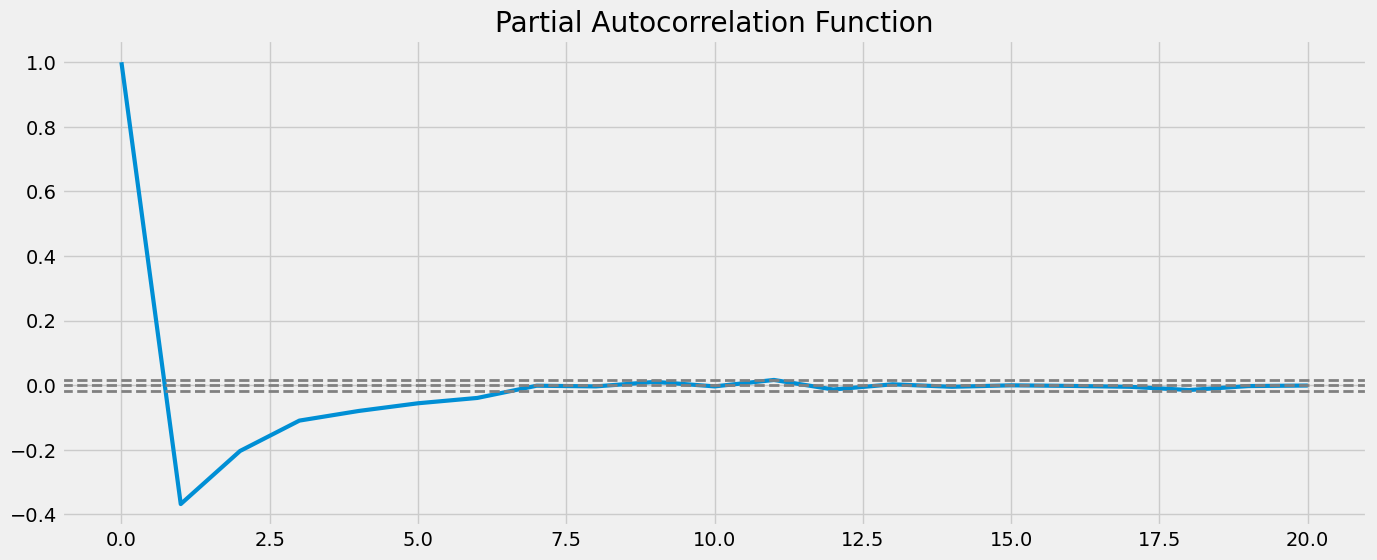

In [82]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_diff.dropna(), nlags = 20)
lag_pacf = pacf(train_diff.dropna(), nlags = 20, method= "ols")

plt.figure(figsize = (15,6))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf, linewidth = 3)
plt.axhline( y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y= -1.96/np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = 1.96 /np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Autocorrelation Function")
plt.show()

# PACF
plt.figure(figsize = (15,6))
plt.plot(lag_pacf, linewidth = 3)
plt.axhline(y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = -1.96/np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y = 1.96/np.sqrt(len(train_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Partial Autocorrelation Function")
plt.show()

#### *Choose p,q:* 

In [86]:
arma_mod02 = sm.tsa.ARMA(train_diff.fillna(0),(0,2)).fit() 
print("arma_mod02:",arma_mod02.aic,arma_mod02.bic,arma_mod02.hqic) 

arma_mod60 = sm.tsa.ARMA(train_diff.fillna(0),(6,0)).fit() 
print("arma_mod60:",arma_mod60.aic,arma_mod60.bic,arma_mod60.hqic) 

arma_mod70 = sm.tsa.ARMA(train_diff.fillna(0),(7,0)).fit() 
print("arma_mod70:",arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic) 

arma_mod62 = sm.tsa.ARMA(train_diff.fillna(0),(6,2)).fit() 
print("arma_mod62:",arma_mod62.aic,arma_mod62.bic,arma_mod62.hqic)

arma_mod72 = sm.tsa.ARMA(train_diff.fillna(0),(7,2)).fit() 
print("arma_mod72:",arma_mod72.aic,arma_mod72.bic,arma_mod72.hqic)

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


arma_mod02: 136768.03729185066 136798.17393781483 136778.07634221125


E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


arma_mod60: 136761.3605272673 136821.63381919565 136781.4386279885


E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


arma_mod70: 136763.33852930405 136831.14598272345 136785.9263926154


E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


arma_mod62: 136761.79499244457 136837.136607355 136786.89261834606


E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


arma_mod72: 136767.0416231561 136849.9173995576 136794.64901164777


p = 6, q = 0 achieves best results.

#### ***Seasonal Analyzing:***

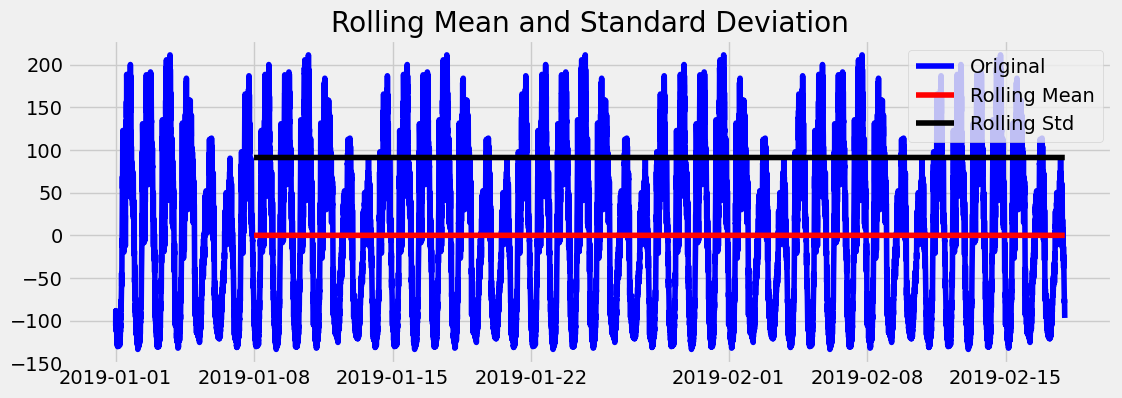

Results of Dickey Fuller test: 
Test Statistics               -9.422426e+00
p-value                        5.457891e-16
# Lag Used                     4.200000e+01
Number of Observations Used    1.378100e+04
Critical Value (1%)           -3.430825e+00
Critical Value (5%)           -2.861750e+00
Critical Value (10%)          -2.566882e+00
dtype: float64


In [51]:
plt.figure(figsize = (12,4))
train_decompose = pd.DataFrame(seasonal)
train_decompose['date'] = train.index
train_decompose.set_index('date', inplace = True)
train_decompose.dropna(inplace = True)
test_stationary(train_decompose[0])

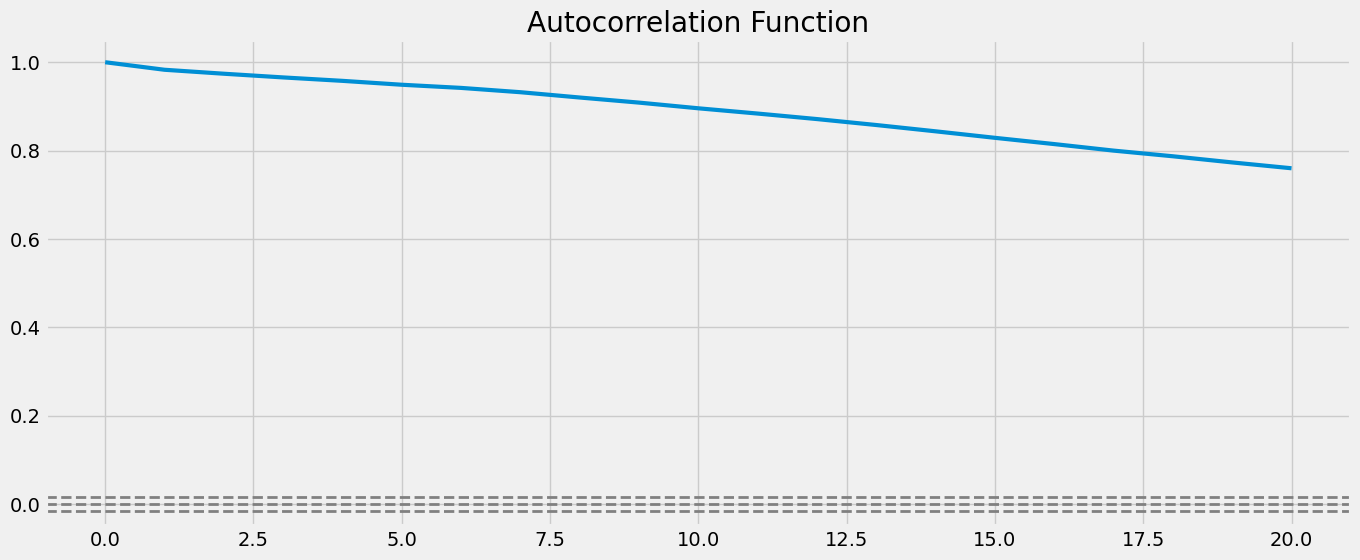

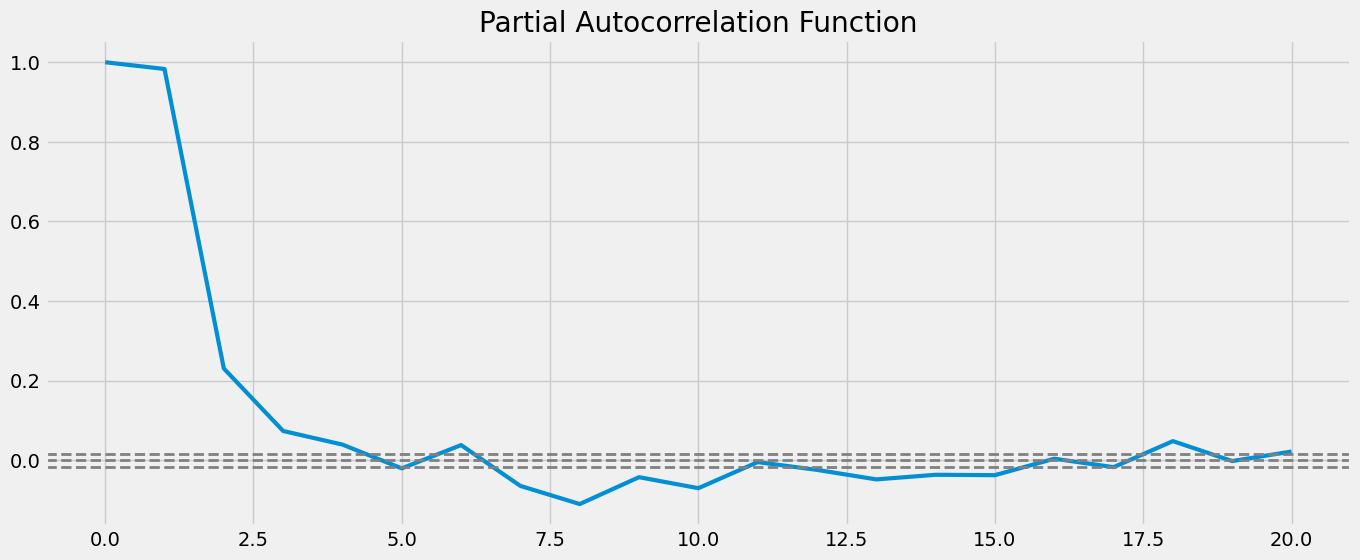

In [52]:
lag_acf = acf(train_decompose.dropna(), nlags = 20)
lag_pacf = pacf(train_decompose.dropna(), nlags = 20, method= "ols")

plt.figure(figsize = (15,6))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf, linewidth = 3)
plt.axhline( y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y= -1.96/np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = 1.96 /np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Autocorrelation Function")
plt.show()

# PACF
plt.figure(figsize = (15,6))
plt.plot(lag_pacf, linewidth = 3)
plt.axhline(y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = -1.96/np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y = 1.96/np.sqrt(len(train_decompose.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Partial Autocorrelation Function")
plt.show()

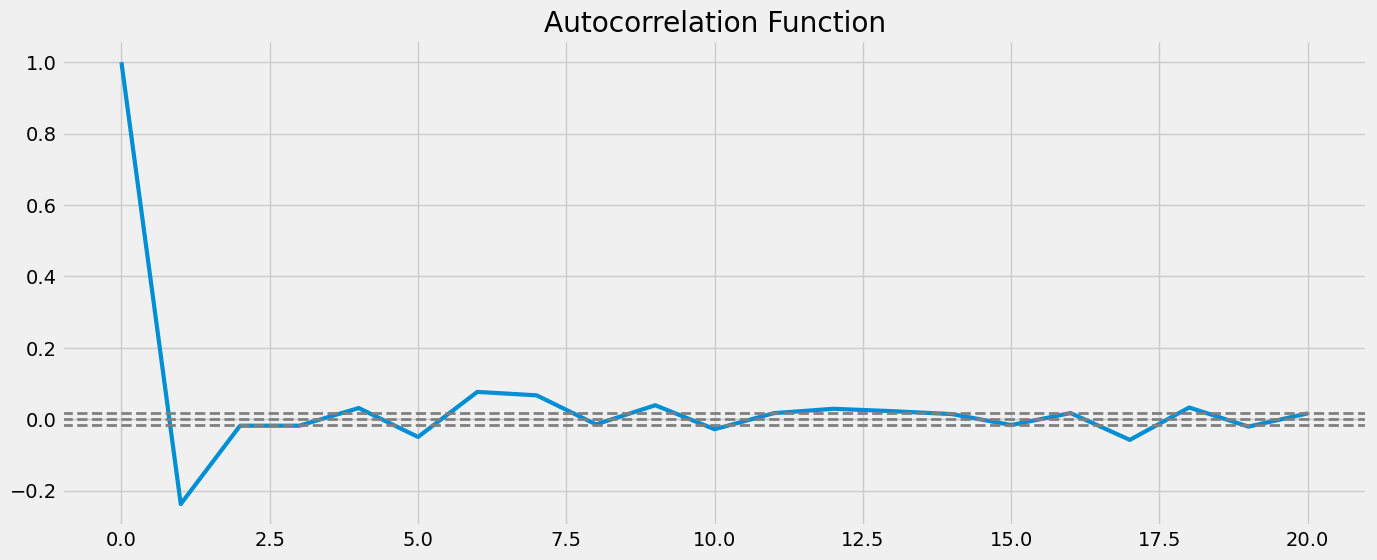

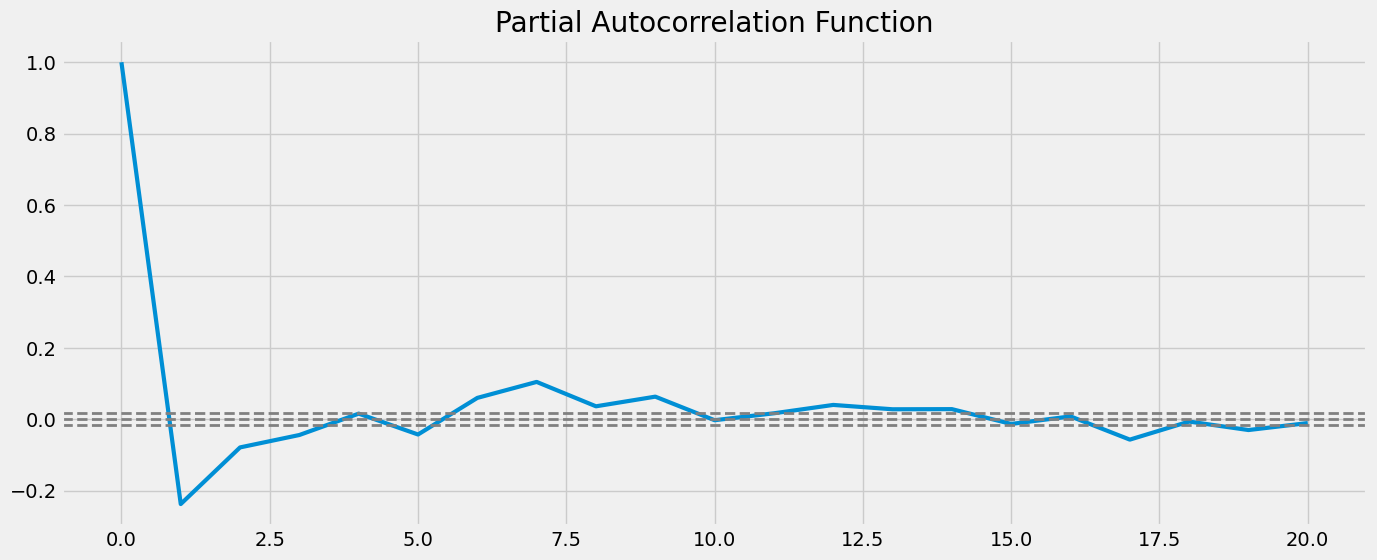

In [53]:
train_decompose_diff = train_decompose - train_decompose.shift(1)

lag_acf = acf(train_decompose_diff.dropna(), nlags = 20)
lag_pacf = pacf(train_decompose_diff.dropna(), nlags = 20, method= "ols")

plt.figure(figsize = (15,6))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf, linewidth = 3)
plt.axhline( y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y= -1.96/np.sqrt(len(train_decompose_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = 1.96 /np.sqrt(len(train_decompose_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Autocorrelation Function")
plt.show()

# PACF
plt.figure(figsize = (15,6))
plt.plot(lag_pacf, linewidth = 3)
plt.axhline(y = 0, linestyle = "--", color = "gray", linewidth = 2)
plt.axhline(y = -1.96/np.sqrt(len(train_decompose_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.axhline( y = 1.96/np.sqrt(len(train_decompose_diff.dropna())), linestyle = "--", color = "gray", linewidth = 2)
plt.title("Partial Autocorrelation Function")
plt.show()

q = 2 (seasonal)

#### 4.1 AR Model

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


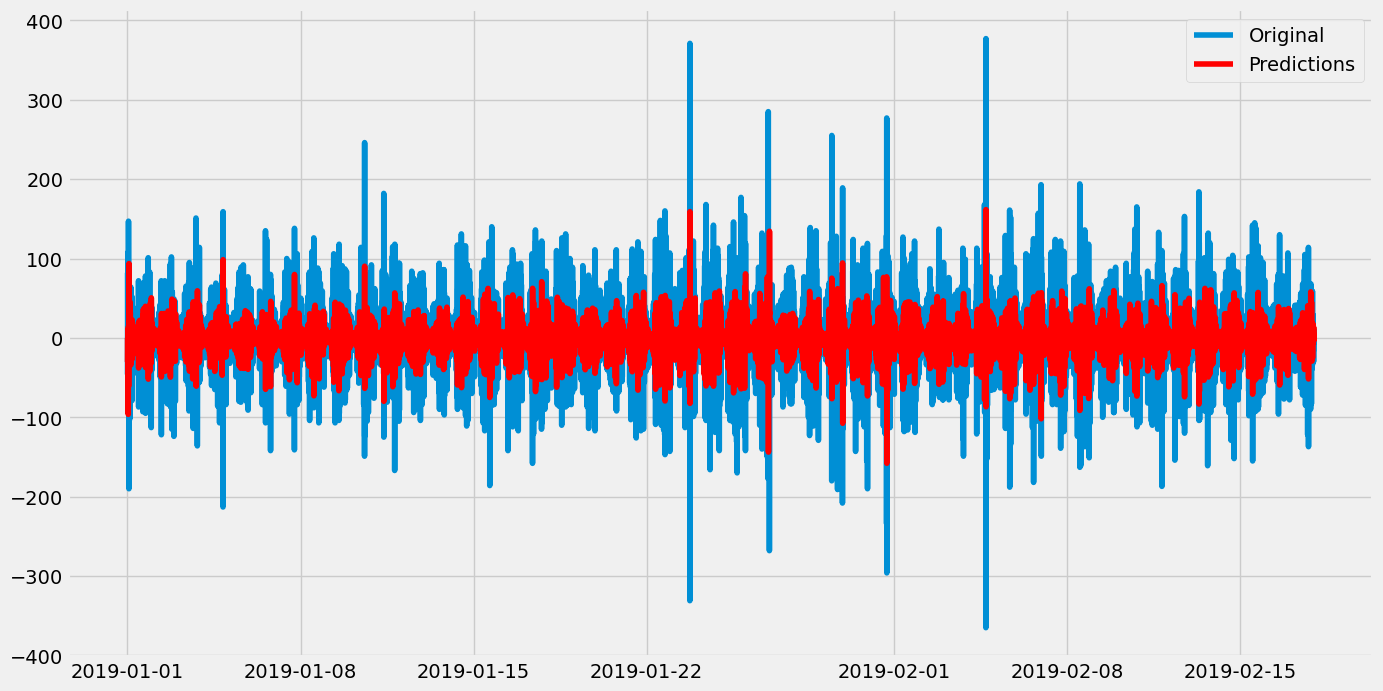

In [54]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(train['count'], order = (6,1,0))  #here q value is zero since it is AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [55]:
AR_predict = results_AR.predict(start = "2019-02-18 00:00:00", end = "2019-02-24 23:55:00")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['count'])[0], index = valid.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0)
AR_predict = np.exp(AR_predict1)

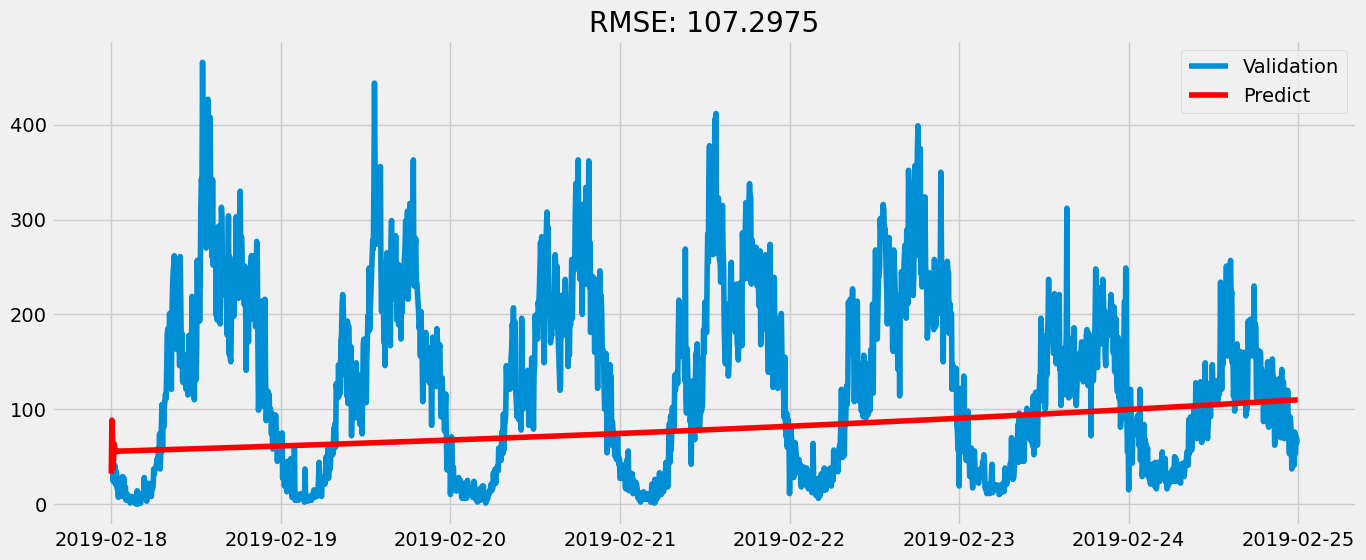

In [56]:
plt.figure(figsize = (15,6))
plt.plot(valid['count'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(valid['count'], AR_predict))))
plt.show()

#### 4.2 Moving Average Model

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


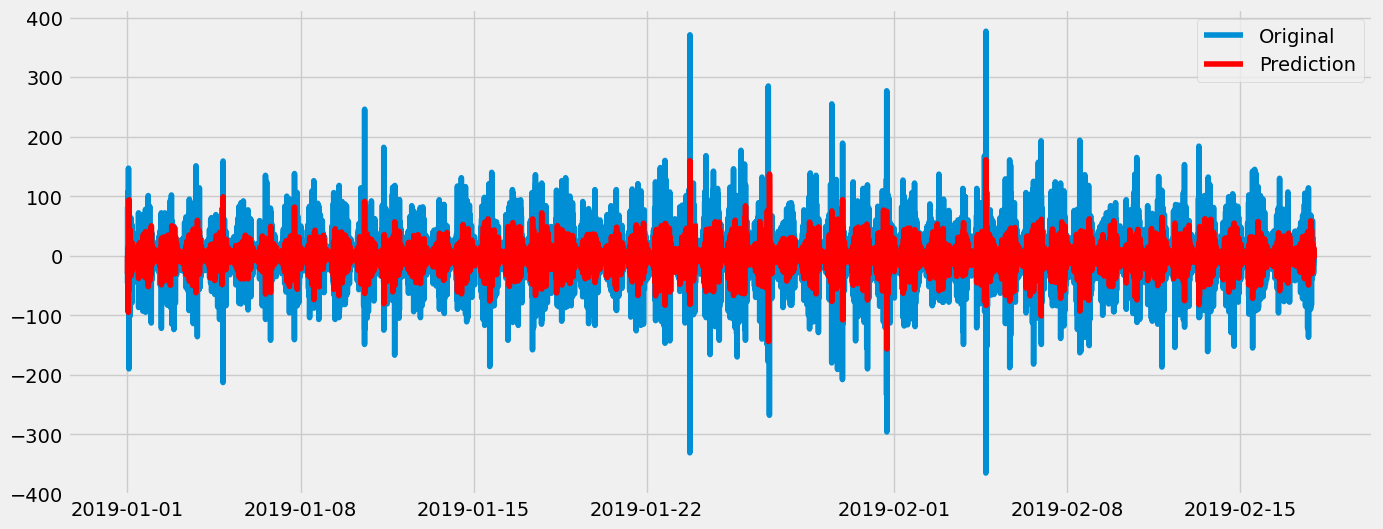

In [57]:
plt.figure(figsize = (15,6))
model = ARIMA(train['count'], order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [58]:
MA_predict = results_MA.predict(start = "2019-02-18 00:00:00", end = "2019-02-24 23:55:00")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

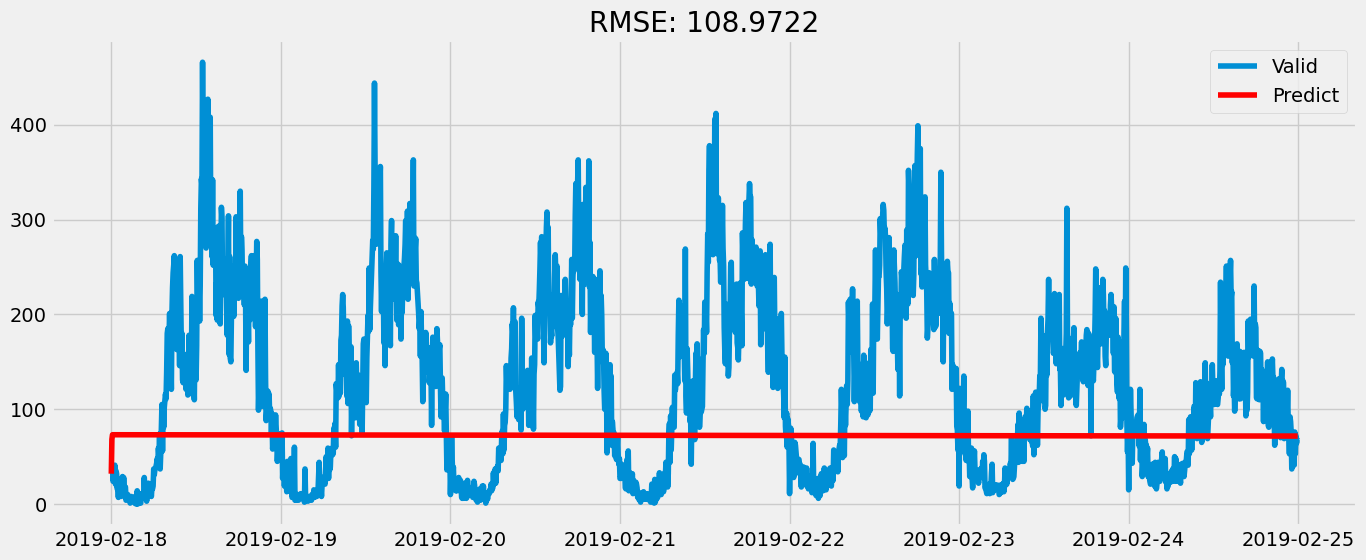

In [59]:
plt.figure(figsize = (15,6))
plt.plot(valid['count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(valid['count'], MA_predict))))
plt.show()

#### 4.3 Combined Model

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


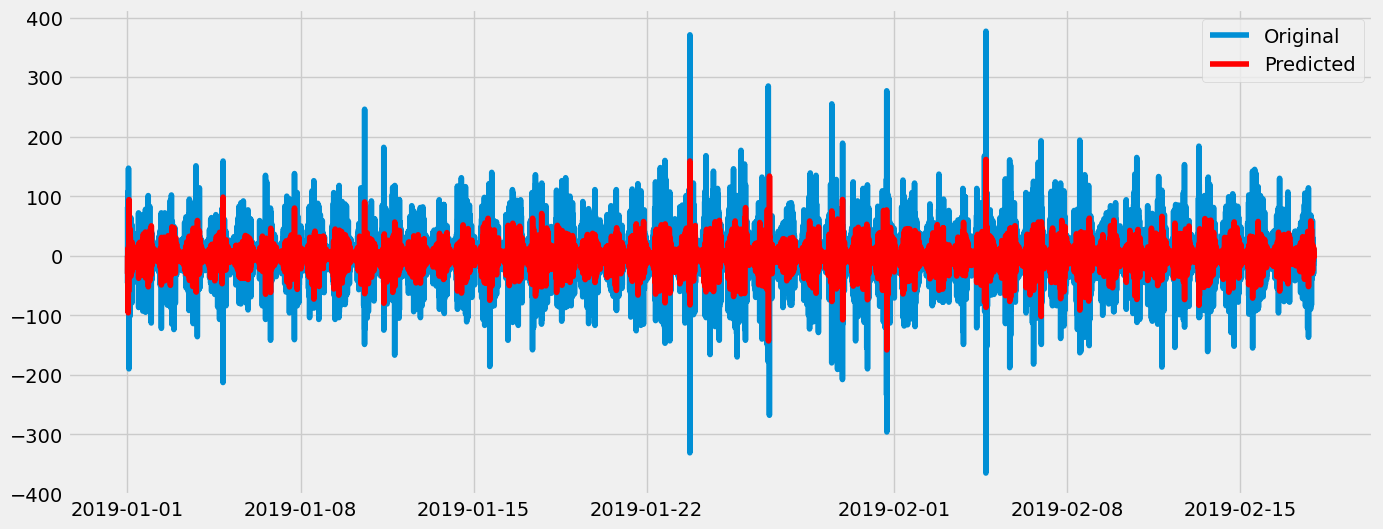

In [87]:
plt.figure(figsize = (15,6))
model = ARIMA(train['count'], order=(7, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [88]:
# Function to scale model to original scale
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(given_set['count'], predict))))
    plt.show()
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(given_set['count'], predict))))
    plt.show()

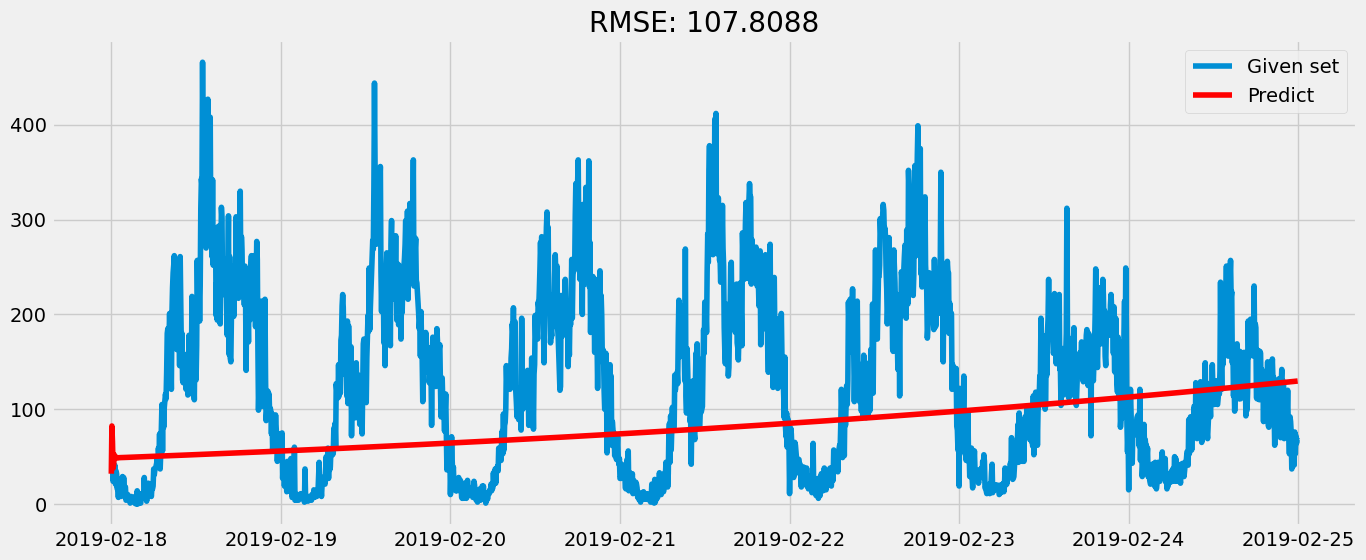

In [89]:
ARIMA_predict_diff=results_ARIMA.predict(start = "2019-02-18 00:00:00", end = "2019-02-24 23:55:00")

plt.figure(figsize = (15,6))
check_prediction_diff(ARIMA_predict_diff, valid)

#### 4.4 SARIMAX Model

E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
E:\Anaconda3\envs\urbsim\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Text(0.5, 1.0, 'SARIMAX Model')

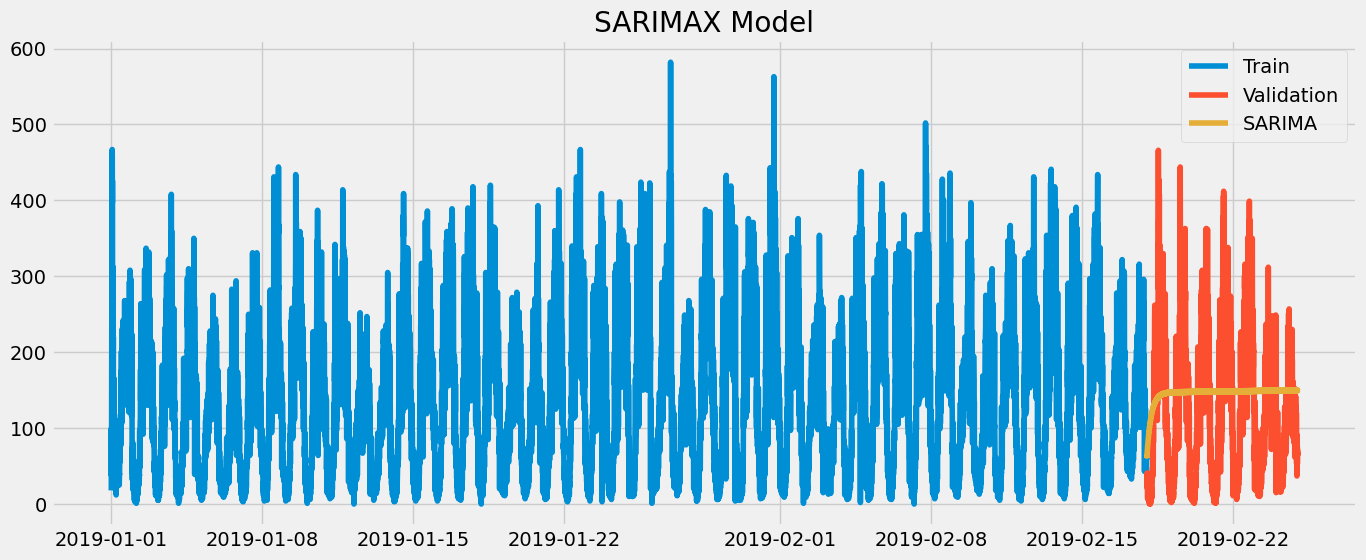

In [79]:
import statsmodels.api as sm

fit1 = sm.tsa.statespace.SARIMAX(train['count'], order = (6,1,2), seasonal_order =(0,1,2,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start = "2019-02-18 00:00:00", end = "2019-02-24 23:55:00", dynamic=True)
plt.figure(figsize=(15,6))
plt.plot(train['count'], label = "Train")
plt.plot(valid['count'], label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA") 
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [80]:
rms = sqrt(mean_squared_error(valid['count'], y_hat_avg.SARIMA))
print(rms)

92.76540155829301
